До ----------------------------------------------------------------------- действия аналогичны предыдущему пункту 3 лабораторной.
Импортируем все, что нужно:

In [1]:
import pandas as pd
import numpy as np

Теперь загрузим датасет:

In [2]:
data = pd.read_csv('Titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Найдем размер датасета:

In [3]:
data.shape

(891, 12)

Удалим все строки, содержащие пропущенные данные:

In [4]:
data_new = data.dropna()

Посмотрим, какие типы данных имеют признаки:

In [5]:
data_new.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Видим, что признаки Name, Sex, Ticket, Cabin и Embarked имеют не числовые значения (object). Удаляем все, кроме Sex и Embarked:

In [6]:
data_new = data_new.drop(['Name', 'Ticket', 'Cabin'], axis=1)

Выведем уникальные значения в оставшихся категориальных столбцах Sex и Embarked:

In [7]:
print("Sex: ", data_new['Sex'].unique())
print('Embarked: ', data_new['Embarked'].unique())

Sex:  ['female' 'male']
Embarked:  ['C' 'S' 'Q']


Кодируем категориальные данные в столбцах Sex:

In [8]:
data_new.loc[data_new['Sex'] == 'male', 'Sex'] = 0
data_new.loc[data_new['Sex'] == 'female', 'Sex'] = 1
data_new['Sex'] = pd.to_numeric(data_new['Sex'])

Кодируем категориальные данные в столбцах Embarked:

In [9]:
data_new.loc[data_new['Embarked'] == 'C', 'Embarked'] = 1
data_new.loc[data_new['Embarked'] == 'Q', 'Embarked'] = 2
data_new.loc[data_new['Embarked'] == 'S', 'Embarked'] = 3
data_new['Embarked'] = pd.to_numeric(data_new['Embarked'])

Удалим столбец PassengerId:

In [10]:
data_new.drop(['PassengerId'], axis=1, inplace=True)

Посмотрим сколько данных осталось после обработки:

In [11]:
print('Процент оставшихся данных: ', data_new.shape[0] * data_new.shape[1] / data.shape[0] / data.shape[1], '%')

Процент оставшихся данных:  0.13692480359147027 %


Т.е. мы потеряли примерно 86,3% данных.
Теперь отделим целевую переменную от данных и разобьем их на обучающую и тестовую выборки:

In [12]:
from sklearn.model_selection import train_test_split
x  = data_new.drop(['Survived'], axis=1)
y = data_new['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=0)

---------------------------------------------------------------------------------------------------------------------------
Будем обучать модели и оценивать их качество с помощью функции:

In [13]:
from sklearn.metrics import accuracy_score                                            #
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve       #
from sklearn.metrics import recall_score, precision_score, f1_score                   # импортируем все, что нам нужно
import matplotlib.pyplot as plt                                                       #
import seaborn as sns                                                                 #

def train_and_score(clf, model_name):                                              # удобная функция для анализа моделей
	clf.fit(x_train, y_train)                                                      # 'обучаем' полученную модель на нашей тренировочной выборке
	y_pred = clf.predict(x_test)                                                   # просим предсказать значения из тестовой выборки
	y_pred_probs = clf.predict_proba(x_test)                                       # просим предсказать вероятности возможных предсказываемых результатов
	print(model_name)                                                              # выводим название модели
	print('Точность: ', accuracy_score(y_test, y_pred))                            # выводим точность 
	print('Recall: ', recall_score(y_test, y_pred))                                # выводим процентное содержание действительно правильных ответов от всех ответов, которых посчитали как правильные
	print('Precision: ', precision_score(y_test, y_pred))                          # выводим процентное содержание действительно неправильных ответов от всех ответов, которых посчитали как неправильные
	print('F1: ', f1_score(y_test,y_pred))                                         # смесь recall и precision
	fig, axs = plt.subplots(1, 3, figsize=(16, 5))                                 # обозначаем размер графика, а также его 'схему'
	sns.heatmap(confusion_matrix(y_test, y_pred), ax=axs[0])                       # выводим тепловую карту матрицы ошибок
	axs[0].set_title('Тепловая карта матрицы ошибок')                              # добавляем подпись к тепловой матрице ошибок
	precision, recall, _ = precision_recall_curve(y_test, y_pred_probs[:,1])       # кривая PR
	axs[1].plot(precision, recall)                                                 # рисуем кривую PR
	axs[1].set_xlabel('Presicion')                                                 # меняем название оси OX
	axs[1].set_ylabel('Recall')                                                    # меняем название оси OY
	axs[1].set_title('Presicion-recall кривая')                                    # добавляем подпись к кривой PR
	TPR, FPR, _ = roc_curve(y_test, y_pred_probs[:,1])                             # кривая ROC
	axs[2].plot(TPR, FPR)                                                          # рисуем кривую ROC
	axs[2].set_xlabel('FPR')                                                       # меняем название оси OX
	axs[2].set_ylabel('TPR')                                                       # меняем название оси OY
	axs[2].set_title('ROC кривая')                                                 # добавляем подпись к кривой ROC

Применим логистическую регрессию:

Логистическая регрессия
Точность:  0.7454545454545455
Recall:  0.8648648648648649
Precision:  0.7804878048780488
F1:  0.8205128205128205


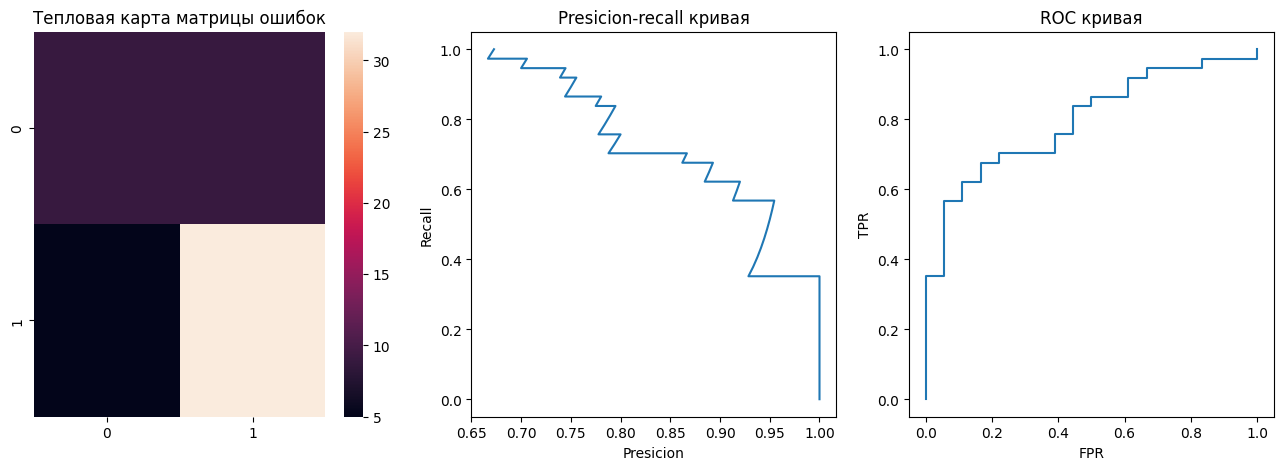

In [14]:
from sklearn.linear_model import LogisticRegression
train_and_score(LogisticRegression(max_iter=200), 'Логистическая регрессия')   # анализируем логистическую регрессию

Модель угадывает лишь 75% ответов. При этом она склонна предсказывать 1, т.к. имеется большой recall и precision меньше, это подтверждается и на тепловой карте матрицы ошибок: в правом нижнем углу много значений. Но усредненный F1 получается неплохим. Precision-recall и ROC кривые нормальные. В целом модель хорошая.
Теперь применим модель опорных векторов:

Модель опорных векторов
Точность:  0.6909090909090909
Recall:  0.7567567567567568
Precision:  0.7777777777777778
F1:  0.7671232876712328


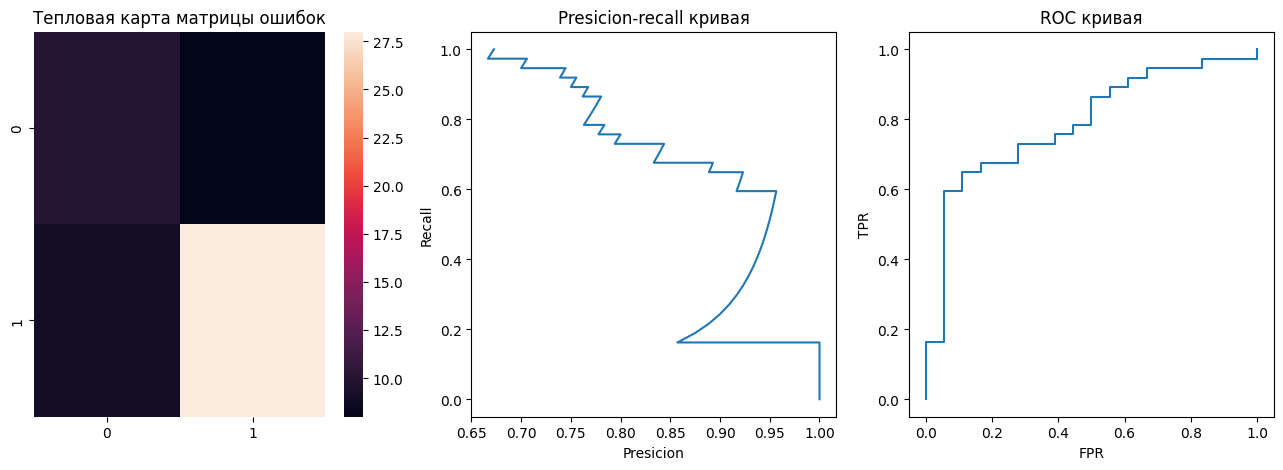

In [15]:
from sklearn.svm import SVC
train_and_score(SVC(kernel='linear', probability=True), 'Модель опорных векторов')  # анализируем моедль опорных векторов

В этом случае модель хорошо предсказывает 1, но с предсказанием 0 все плохо. Она часто считает 0 в качестве 1. Это видно как по матрицам ошибок, так и по precision и recall. Модель получилась хуже, чем логистическая регрессия.
Теперь применим модель ближайших соседей:

Модель ближайших соседей
Точность:  0.6727272727272727
Recall:  0.918918918918919
Precision:  0.6938775510204082
F1:  0.7906976744186046


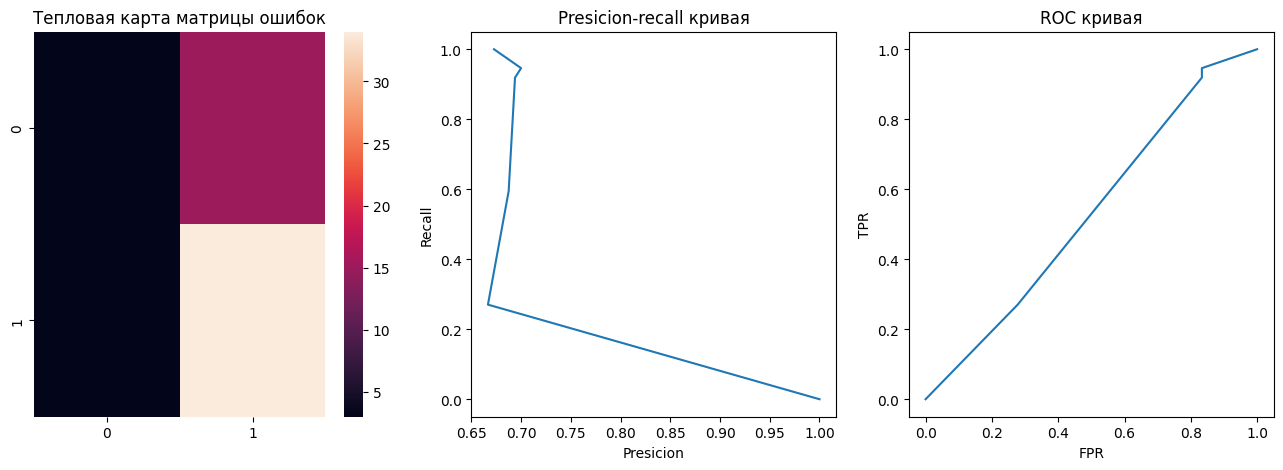

In [16]:
from sklearn.neighbors import KNeighborsClassifier
train_and_score(KNeighborsClassifier(), 'Модель ближайших соседей')  # анализируем модель ближайших соседей

Метод ближайших соседей вообще считает почти все наблюдения истинными: имеется очень большой Recall и маленький Precision. При этом модель совсем не умеет предсказывать вероятности: Precision-recall и ROC кривые получились очень плохими.
Лучшей моделью оказалась логистическая регрессия. Она лучше всех умеет отделять истинные наблюдения от ложных.